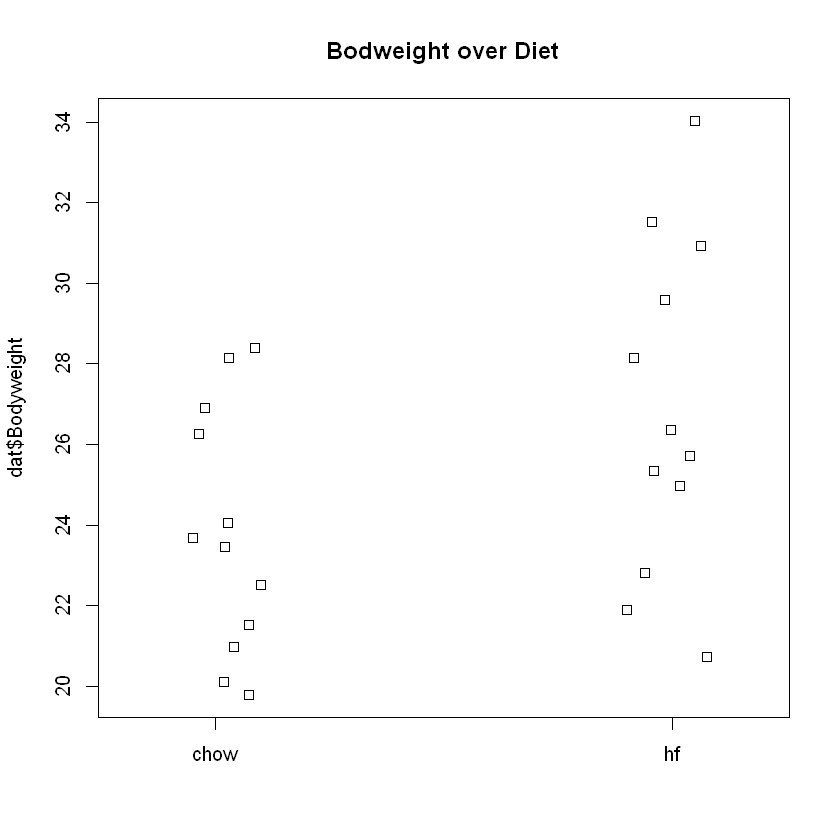

In [1]:
#Using Linear Models
#Analyze mice data with lm instead of t-test
dat <- read.csv('femalemiceweights.csv')
stripchart(dat$Bodyweight ~ dat$Diet, vertical=TRUE, method='jitter',
          main='Bodweight over Diet')


In [2]:
#Demonstrate overlap, building a design matrix
levels(dat$Diet)

[1] "chow" "hf"

In [4]:
x <- model.matrix(~ Diet, data=dat)
head(x)

,(Intercept),Diethf
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0


In [10]:
#Minimize the sum of squares
Y <- dat$Bodyweight
X <- model.matrix(~ Diet, data=dat)
solve(t(X) %*% X) %*% t(X) %*% Y

(Intercept),23.81333
Diethf,3.020833


In [11]:
#the coeffs are average of control group and difference of the average
s<- split(dat$Bodyweight, dat$Diet)
mean(s[['chow']])
mean(s[['hf']]) - mean(s[['chow']])

[1] 23.81333

[1] 3.020833

In [12]:
#Use lm, linear model function to run lm model
fit <- lm(Bodyweight ~ Diet, data=dat)
summary(fit)


Call:
lm(formula = Bodyweight ~ Diet, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1042 -2.4358 -0.4138  2.8335  7.1858 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   23.813      1.039  22.912   <2e-16 ***
Diethf         3.021      1.470   2.055   0.0519 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.6 on 22 degrees of freedom
Multiple R-squared:  0.1611,	Adjusted R-squared:  0.1229 
F-statistic: 4.224 on 1 and 22 DF,  p-value: 0.05192


In [13]:
(coefs <- coef(fit))

(Intercept)      Diethf 
  23.813333    3.020833

In [14]:
#lm estimates
summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.381333e+01,1.039353e+00,2.291168e+01,7.642256e-17
Diethf,3.0208333,1.4698674,2.0551740,0.0519248


In [15]:
#t-statistic
ttest <- t.test(s[['hf']], s[['chow']], var.equal=TRUE)
summary(fit)$coefficients[2,3]

[1] 2.055174

In [16]:
ttest$statistic

t 
2.055174

In [ ]:
#Use falling object example 
#